# Different interval length


In this notebook we want to analyse the effect of the different interval length to our infered soccer related effect.

In [2]:
import pickle
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from tqdm.auto import tqdm
import os

sys.path.append("../../")
sys.path.append("../../covid19_inference")
sys.path.append("../")

import covid19_soccer
from covid19_soccer.plot.utils import get_from_trace
import covid19_inference as cov19

from header_plotting import *

In [3]:
%load_ext autoreload
%autoreload 2

In [20]:

# Save figure  keyword args   
save_kwargs = {
    "transparent":True,
    "dpi":300,
    "bbox_inches":"tight"
}
fig_path = "../figures/SI"

def load(fstr):
    with open(fstr, "rb") as f:
         return pickle.load(f)


In [9]:
countries = ['England', 'Czechia', 'Scotland', 'Spain', 'Italy',
       'Germany','France']

tune = 2000
draws = 4000
max_treedepth = 12
traces, models, dls = {}, {}, {}
for country in tqdm(countries):
    #'UEFA-beta=False-country=England-offset_games=0-draw_delay=True-weighted_alpha_prior=0-prior_delay=-1-width_delay_prior=0.1-sigma_incubation=-1.0-median_width_delay=1.0-tune=200-draws=300-max_treedepth=10.pickled'
    models_t, traces_t, dls_t = [],[],[]
    for interval in [6.0,10.0,20.0]:
        fstr=lambda tune, draws, max_treedepth: (f"/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run"+
            f"-beta=False"+
            f"-country={country}"+
            f"-offset_data=0"+
            f"-prior_delay=-1"+
            f"-median_width_delay=1.0"+
            f"-interval_cps={interval}"+
            f"-f_fem=0.33"+
            f"-len=normal"+
            f"-abs_sine=False"+
            f"-t={tune}"+
            f"-d={draws}"+
            f"-max_treedepth={max_treedepth}.pkl")
        model = None
        if os.path.exists(fstr(tune, draws, max_treedepth)):
            model, trace = load(fstr(tune, draws, max_treedepth))
            print(fstr(tune, draws, max_treedepth))
        if model is None: 
            print(fstr(tune, draws, max_treedepth), " not found")
            continue
        dl = covid19_soccer.dataloader.Dataloader_gender(countries=[country])
        models_t.append(model)
        traces_t.append(trace)
        dls_t.append(dl)
    models[country] = models_t
    traces[country] = traces_t
    dls[country] = dls_t

  0%|          | 0/7 [00:00<?, ?it/s]

/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=England-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=6.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=England-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=10.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=England-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=20.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=Czechia-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=6.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=Czechia-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=10.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=Czechia-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=20.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=Scotland-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=6.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=Scotland-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=10.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=Scotland-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=20.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=Spain-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=6.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=Spain-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=10.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=Spain-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=20.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=Italy-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=6.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=Italy-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=10.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=Italy-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=20.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=Germany-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=6.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=Germany-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=10.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=Germany-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=20.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=France-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=6.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=France-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=10.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/data.nst/share/soccer_project/covid_uefa_traces14_robustness/run-beta=False-country=France-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=20.0-f_fem=0.33-len=normal-abs_sine=False-t=2000-d=4000-max_treedepth=12.pkl


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


Country	2.5	50.0	97.5	>0
England0	8.356079270494387	12.85146511122739	17.164888751352684	1.0
England1	6.489953789564166	9.21158887382494	16.334553751029894	1.0
England2	11.064810383223454	15.687161163112883	20.042652763826407	1.0
Country	2.5	50.0	97.5	>0
Czechia0	3.4221032448186186	8.374578791462564	13.02976043308933	0.99928125
Czechia1	3.400550194487772	8.634224458783448	13.142899508143088	0.99909375
Czechia2	2.4326756743471187	8.264965000567324	13.101078150609057	0.9974375
Country	2.5	50.0	97.5	>0
Scotland0	1.8668315751769962	2.795208001043874	4.201652760996065	1.0
Scotland1	1.7754374344208281	2.5832388759309977	3.4655277502118333	1.0
Scotland2	2.042119354562755	2.8862446364598986	3.7609065939676336	1.0
Country	2.5	50.0	97.5	>0
Spain0	-0.6149964104692772	2.9090137631486748	8.3624512529025	0.9476875
Spain1	-0.9933444348689667	2.924887816581964	8.501307571979261	0.92965625
Spain2	-2.5776603392264135	1.6279747251967231	6.026360401074315	0.7776875
Country	2.5	50.0	97.5	>0
Italy0	-7.85956

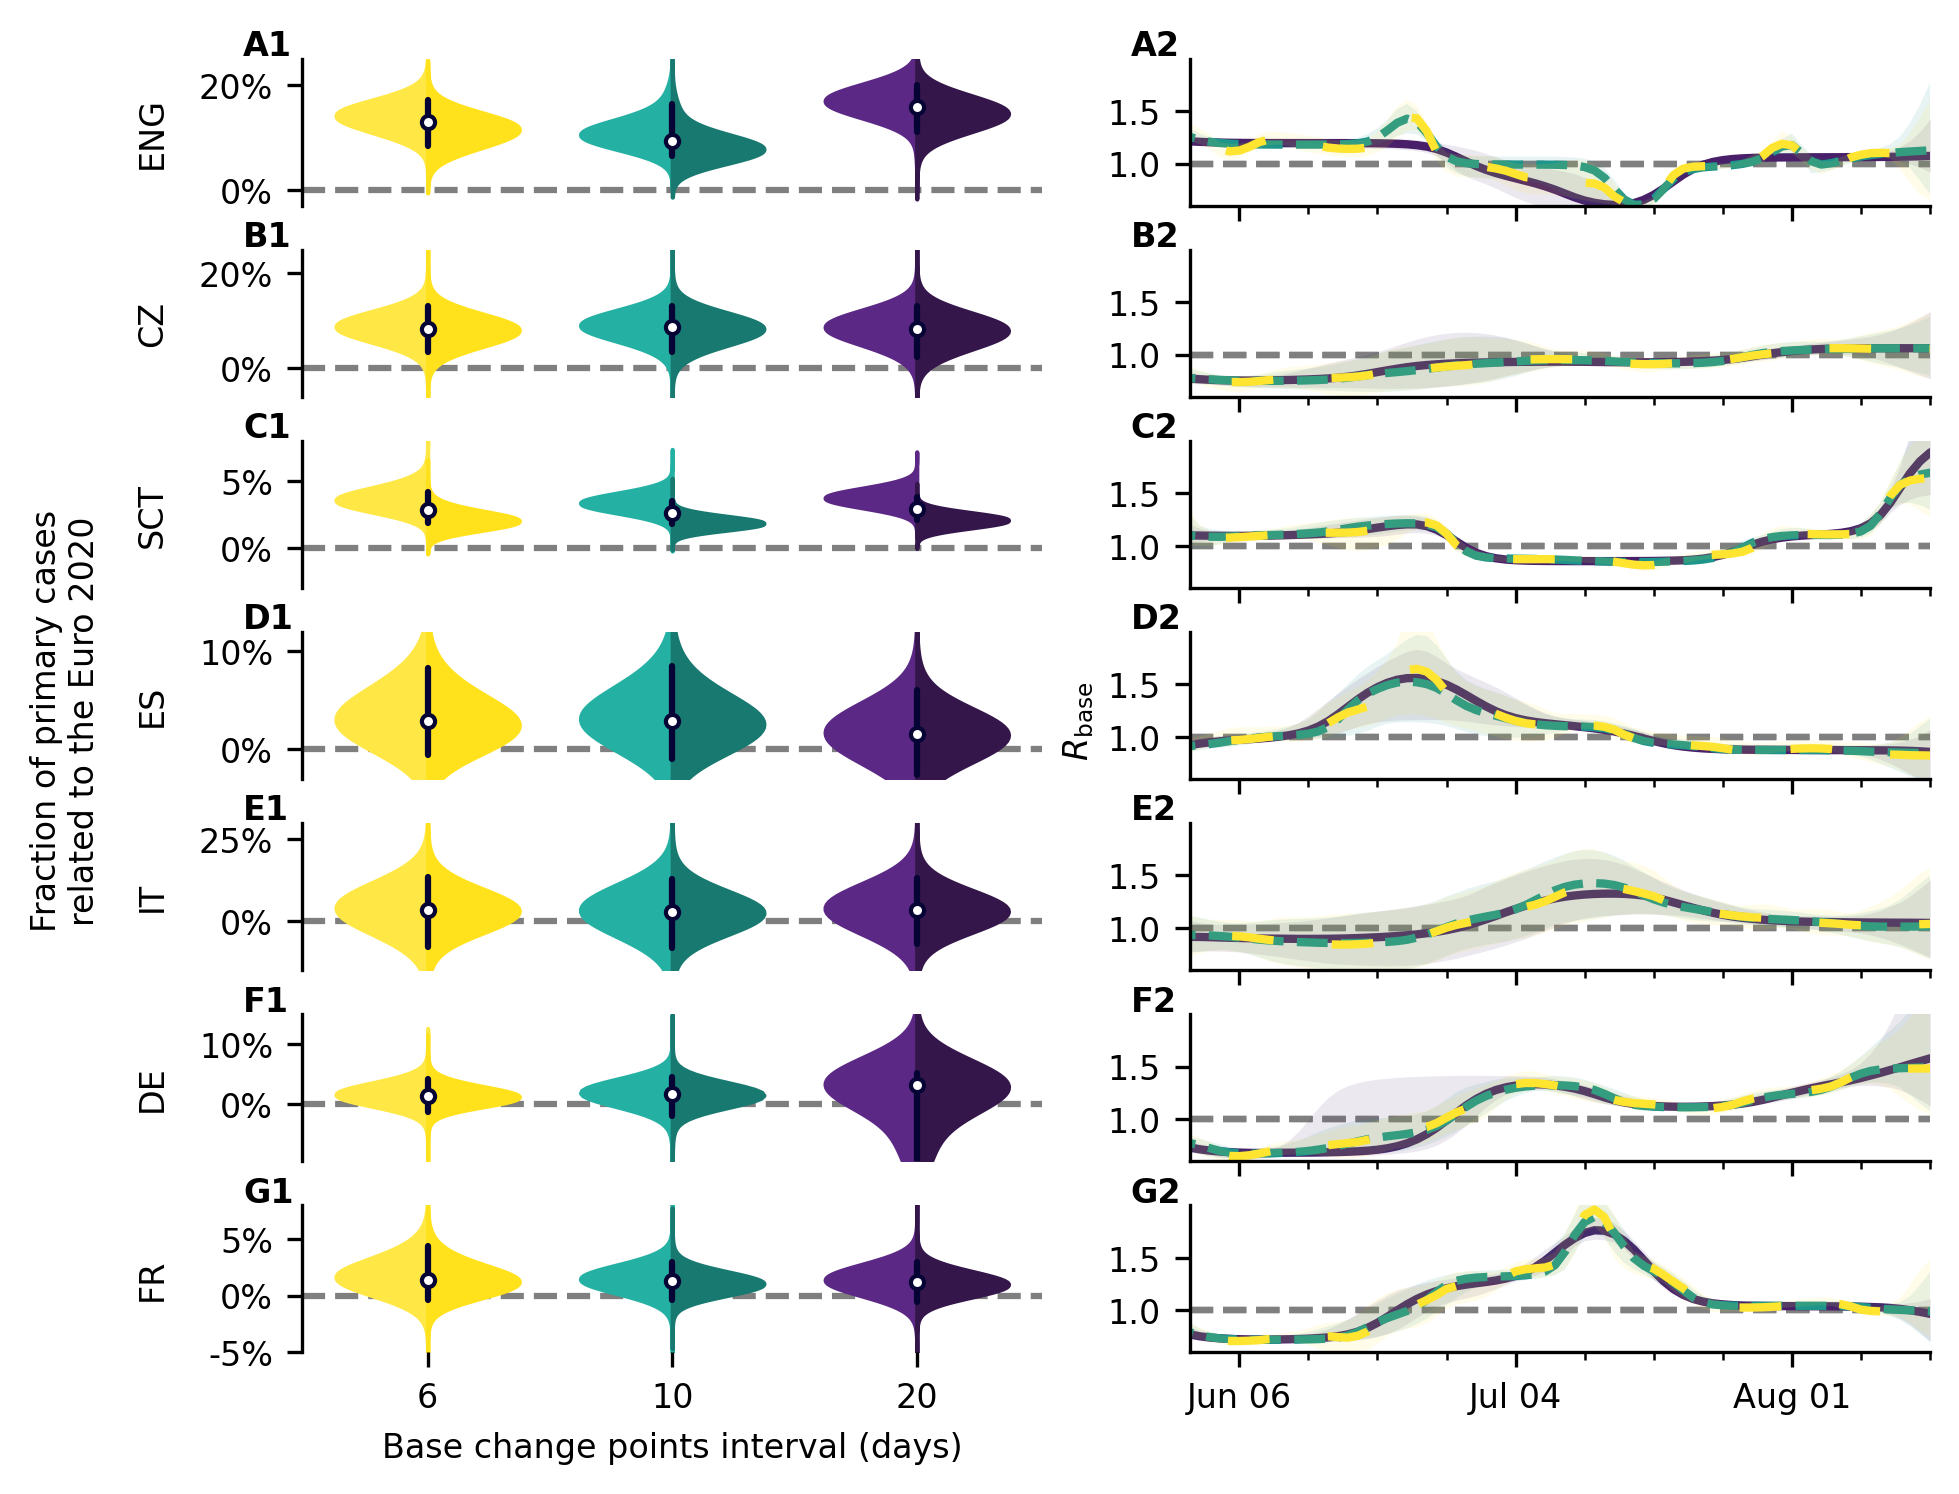

In [22]:
from covid19_soccer.plot.utils import lighten_color
from matplotlib.colors import to_hex
fig, axes = plt.subplots(len(countries),2,figsize=(7,len(countries)*0.8),gridspec_kw={"hspace":0.3,"wspace":0.2})

colors_base = ["#ffe530","#1e958a","#481f68"]
l = 0.9
d = 1.1

colors_mf = []
for col in colors_base:
    colors_mf.append(to_hex(lighten_color(col,l)))
    colors_mf.append(to_hex(lighten_color(col,d)))
colors_mf = np.array(colors_mf)

for i, country in enumerate(countries):
    covid19_soccer.plot.other.soccer_related_cases_overview(
        ax=axes[i,0],
        traces=traces[country],
        models=models[country],
        dls=dls[country],
        country_order=[0,1,2],
        colors=colors_mf,
        bw=1,
        remove_outliers=True
        )
    axes[i,0].set_xticklabels(["6","10","20"])
    axes[i,0].set_ylabel(dls[country][0].countries_iso2[0].replace("GB-",""))
    axes[i,0].yaxis.set_label_coords(-0.18, 0.5)

    if i != len(countries)-1:
        axes[i,0].set_xticklabels([])
        axes[i,0].tick_params(bottom=False)

    for j, (trace, model , dl, color,ls) in enumerate(zip(traces[country], models[country], dls[country], colors_base, [(0, (5, 7)),"dashed","-"])):
        covid19_soccer.plot.timeseries.R_base(
            ax=axes[i,1],
            trace=trace,
            model=model,
            dl=dl,
            color=color,
            ls=ls,
            lw=2,
            zorder= 1 if j==1 else (2 if j==0 else 0)
        )
        axes[i,1].set_xlim(dl.data_begin,dl.data_end)
    axes[i,1].set_ylim(0.6,2)
    

# Array of capital letters
letters = np.array(list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))

# Add label letters to figure
for i, country in enumerate(countries):
    axes[i,0].text(
        -0.08,
        1.2,
        letters[i]+"1",
        transform=axes[i,0].transAxes,
        fontsize=8,
        fontweight="bold",
        verticalalignment="top"
    )
    axes[i,1].text(
        -0.08,
        1.2,
        letters[i]+"2",
        transform=axes[i,1].transAxes,
        fontsize=8,
        fontweight="bold",
        verticalalignment="top"
    )

    if i != len(countries)-1:
        axes[i,1].set_xticklabels([])
    axes[i,1].set_yticks([1,1.5])


# set ylims
ylims = {
    "England":[-3,25],
    "Czechia":[-6,25],
    "Italy":[-15,30],
    "Scotland":[-3,8],
    "Spain":[-3,12],
    "Germany":[-9.5,15],
    "France":[-5,8],
}
for i, country in enumerate(countries):
    axes[i,0].set_ylim(ylims[country])
    axes[i,1].set_ylabel("")



# Set overarching y label
axes[0,0].text(-0.32,-len(countries)/2,"Fraction of primary cases\nrelated to the Euro 2020",transform=axes[0,0].transAxes,rotation=90,ha="center",va="center",fontsize=8)
axes[0,1].text(-0.15,-len(countries)/2,"$R_\mathrm{base}$",transform=axes[0,1].transAxes,rotation=90,ha="center",va="center",fontsize=8)



axes[-1,0].set_xlabel("Base change points interval (days)")

fig.savefig(f"{fig_path}/intervals.png", **save_kwargs)
fig.savefig(f"{fig_path}/intervals.pdf", **save_kwargs)

plt.show()
plt.close(fig=fig)